In [4]:
import requests, json
import matplotlib.pyplot as plt

api_key=""

headers = {
            "accept": "application/json",
            "Authorization": api_key
        }

In [5]:
netuid = 64

url = f"https://api.taostats.io/api/dtao/subnet_emission/v1?netuid={netuid}&limit=200"
response = requests.get(url, headers=headers)
resJson = json.loads(response.text)
emissionData = resJson['data']

In [6]:
#extract the data
emissions = []
time = []
for emission in emissionData:
    #tao_in is the same as emission as all tao ins add to 1
    temp = float(emission['tao_in_pool'])/1e9*100
    timestamp = emission['timestamp']
    time.append(timestamp)
    emissions.append(temp)
emissions_rev = emissions[::-1]
time_rev = time[::-1]

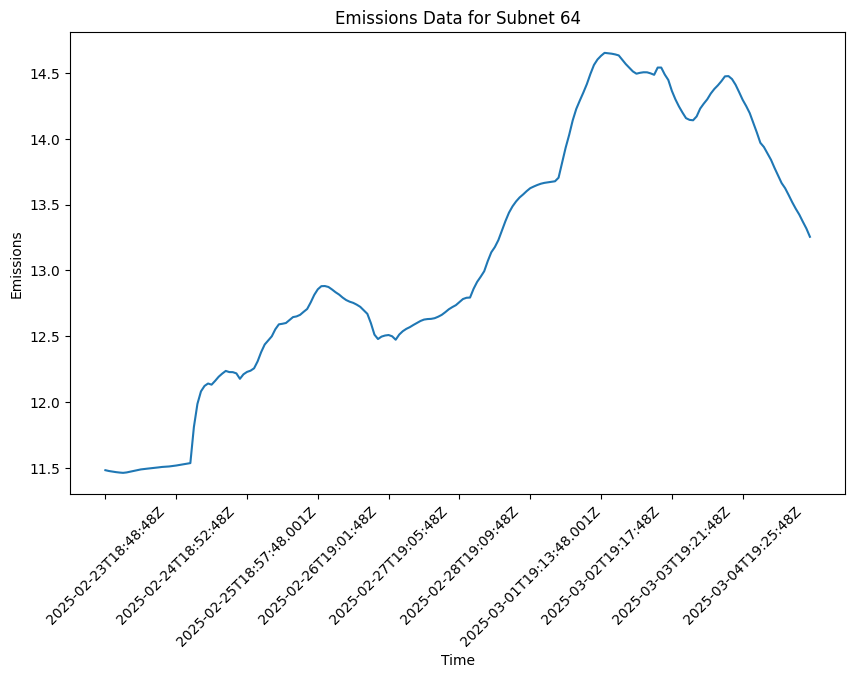

In [7]:
# Plot the data
plt.figure(figsize=(10,6))
plt.plot(time_rev, emissions_rev)
plt.title(f'Emissions Data for Subnet {netuid}')
plt.xlabel('Time')
plt.ylabel('Emissions')
plt.xticks(range(0, len(time_rev), 20), time_rev[::20], rotation=45)
plt.show()